# Naive Bayes

## Introduction

The Naive Bayes classifier is a supervised machine learning algorithm that is used for classification tasks, such as text classification. The goal of the Naive Bayes classifier is to classify data points into predefined categories, also called classes, by estimating the probability of the data point having each class using a predetermined set of features. At the core of Naive Bayes classifier is Bayes Theorem, a statistical tool that describes the probability of an event with knowledge of conditions that might influence the outcome of the event. When applied in Naive Bayes, it predicts the probability of a given object having a specific class, based on the observed features. The ‘naive’ aspect of Naive Bayes comes from the classifier’s assumption that all the data is independent.

There are different versions of Naive Bayes including *Gaussian Naive Bayes*, *Multinomial Naive Bayes*, and *Bernoulli Naive Bayes*. The differences between each version is that they are all defined to accommodate different types of data and be used in different scenarios, so it is important to select the variant that best suits your data. Gaussian Naive Bayes is best suited for continuous data whose features are assumed to follow a normal distribution. This variant is best suited for data that consists of continuous, numeric features. Multinomial Naive Bayes is best suited for text or data represented as counts. It is commonly used in text classification, for example in sentiment analysis. Finally, Bernoulli Naive Bayes works best with binary data whose features are binary variables. It is often used in document classification tasks such as spam detection.


## Preparing Data for Naive Bayes

In order to carry out Naive Bayes, it is important that we preprocess our data. The data cleaning process has happened already and can be found within the [data cleaning tab](../data_cleaning/data_cleaning.ipynb). Since our data is now prepared and cleaned, we need to separate it into training, validation, and testing sets. Training data is typically 80% of a data set and is the data that we give to the model so it can learn the existing releationships and methods that desired outcomes are predicted. The validation set is typically 10% of the data, and is given to the model to help fine tune the model's hyperparameters and prevent overfitting. Finally, the remaining 10% of the data constitutes the test data, which is the data set given to the model to evaluate the model's accuracy and performance. It is used to evaluate how well the model performs on unseen data. 

# Feature Selection for Record Data

### Random Guessing

I've decided to first use a random guessing method to predict my target variable before using Naive Bayes. This is to ensure that I have a point of comparison for when I look at my Naive Bayes accuracy results and to ensure that I can properly contextualize the results.

In [87]:
#| code-fold: true
from sklearn.model_selection import train_test_split
import pandas as pd 
import matplotlib as plt

file_path = "../../../../data/01-modified-data/injury_prevention_data_soccer.csv"
soccer_injury = pd.read_csv(file_path)
soccer_injury.columns = soccer_injury.columns.str.strip()
soccer_injury = soccer_injury.replace({"yes": 1, "no": 0})

x_vars = ['Prevention Measure Stretching', 'Prevention Measure Warm Up',
       'Prevention Measure Specific Strength Exercises',
       'Prevention Measure Bracing', 'Prevention Measure Taping',
       'Prevention Measure Shoe Insoles', 'Prevention Measure Face Masks',
       'Prevention Measure Medical Corset']
y_var = "Number of Injuries"

columns_keep = ['Prevention Measure Stretching', 'Prevention Measure Warm Up',
       'Prevention Measure Specific Strength Exercises',
       'Prevention Measure Bracing', 'Prevention Measure Taping',
       'Prevention Measure Shoe Insoles', 'Prevention Measure Face Masks',
       'Prevention Measure Medical Corset', "Number of Injuries"]
df_features = soccer_injury[columns_keep]

import numpy as np
num_obs = len(df_features)
rng = np.random.default_rng(30)
random_guesses = rng.choice(range(0,10), num_obs)
df_features["random_guesses"] = random_guesses
df_features

/var/folders/kw/p7j6fdpx3vvgm6c0krhwpvb80000gn/T/ipykernel_46857/1024177588.py:29: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Prevention Measure Stretching,Prevention Measure Warm Up,Prevention Measure Specific Strength Exercises,Prevention Measure Bracing,Prevention Measure Taping,Prevention Measure Shoe Insoles,Prevention Measure Face Masks,Prevention Measure Medical Corset,Number of Injuries,random_guesses
0,1,0,1,0,0,0,0,0,6,1
1,1,1,0,0,0,0,0,0,2,2
2,1,0,0,0,0,1,0,0,7,7
3,1,1,1,0,0,0,0,0,1,4
4,1,1,0,0,1,0,0,0,2,3
...,...,...,...,...,...,...,...,...,...,...
134,1,0,0,0,0,0,0,0,0,2
135,1,0,0,1,0,0,0,0,2,3
136,1,1,1,0,1,0,0,1,2,6
137,1,0,0,0,1,1,0,0,1,5


In [88]:
#| code-fold: true
from sklearn.metrics import f1_score

f1 = f1_score(df_features["Number of Injuries"], df_features["random_guesses"], average="macro")
print(f"f1 score: {f1}")
df_features["random_guesses_correct"] = df_features["Number of Injuries"] == df_features["random_guesses"]
correct_random_guess_rows = df_features[df_features["random_guesses_correct"] == True]
random_guess_accuracy = len(correct_random_guess_rows) / len(df_features)
print(f"random guess accuracy: {random_guess_accuracy}")

f1 score: 0.07252856433184302
random guess accuracy: 0.10071942446043165


/var/folders/kw/p7j6fdpx3vvgm6c0krhwpvb80000gn/T/ipykernel_46857/1596175018.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Naive Bayes Evaluation

Now that I have completed random guessing and gotten an accuracy level of approximately 0.101, I will be able to have proper context for the accuracy levels given by Naive Bayes.

In [89]:
#| code-fold: true
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import random

X = soccer_injury[x_vars].values.copy()
y = soccer_injury[y_var].values.copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5000)

def train_GNB_model(x_train,x_test,y_train,y_test,i_print=False):
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    clf = BernoulliNB()
    clf.fit(x_train_scaled, y_train)

    y_train_pred = clf.predict(x_train_scaled)
    y_test_pred = clf.predict(scaler.transform(x_test))

    acc_train = accuracy_score(y_train, y_train_pred)
    acc_test = accuracy_score(y_test, y_test_pred)

    return acc_train, acc_test, clf 

tracc, teacc, clf = train_GNB_model(X_train, X_test, y_train, y_test)

In [90]:
#| code-fold: true
print("train accuracy: ", tracc)
print("test accuracy: ", teacc)
print("classifier: ", clf)

y_pred = clf.predict(X_test)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_pred, y_test)

train accuracy:  0.34234234234234234
test accuracy:  0.14285714285714285
classifier:  BernoulliNB()


Now that I have done Naive Bayes, we can see that Naive Bayes is a more effective method at predicting the number of injuries that an athlete will have based on the prevention methods that they take. The random guess accuracy rate was approximately 0.101 whereas with Naive Bayes, it is approximately 0.142. While still low, the accuracy with Naive Bayes is higher than the accuracy gained with random guessing which means that we are learning something from the data with Naive Bayes. The low accuracy rate could indicate that the number of injuries an athlete will have is a difficult thing to predict. 

### Naive Bayes + Feature Selection

In both of the following feature selection methods, I first create an object for the feature selection method using the chi-squared test and another for the bernoulli Naive Bayes classifier as I am working with binary data. Next the model selects and transforms the training data based on the importance of each feature. The importance is determiend using the chi-squared test. The test data is then transformed using the same selected features as the training set. Finally, the Bernoulli Naive Bayes classifier fits the selected training data from X and y, and creates predictions using the trained data.

The following metrics are used to measure the effectiveness of the model: accuracy, precision, recall, and f1 score. The accuracy score is one that measures overall model performance. It quantifies the proprotion of correctly predicted instances, both positive and negative, out of the total number of instaces. Precision calculates the numnber of correctly predicted positives out of all of the predicted positives. Recall is the measure of the model's ability to corrently identify positive instances. It measures the true positives out of the true positives and false negatives combined. Finally, the F1 score is considered the harmonic mean of precision and recall. 

It is important that we are conscious of overfitting and underfitting. Overfitting occurs when a model is too complex and fits the training data too closely, including noise in the data. This model typically has low bias and high variance. Underfitting is when a model is too simplistic to capture underlying patterns in the data. Underfit models have high bias and low variance. Optimal fitting is where the model strikes a balance between bias and variance. I think that my model is fit relatively well. I think some of the ambiguity I am facing in my data stems from the target label being difficult to predict in nature.



#### SelectPercentile  

In [91]:
#| code-fold: true
from sklearn.feature_selection import SelectKBest, chi2, SelectPercentile
from sklearn.metrics import precision_score, recall_score, f1_score

selector = SelectPercentile(chi2, percentile=10)

bernoilli_nb = BernoulliNB()

X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)
bernoilli_nb.fit(X_train_selected, y_train)
y_pred = bernoilli_nb.predict(X_test_selected)


accuracy = bernoilli_nb.score(X_test_selected, y_test)
print(f"Accuracy Score: {accuracy}")
precision_macro = precision_score(y_test, y_pred, average="macro")
print(f"Precision (Macro): {precision_macro}")
precision_weighted = precision_score(y_test, y_pred, average="weighted")
print(f"Precision (Weighted): {precision_weighted}")
recall_macro = recall_score(y_test, y_pred, average="macro")
print(f"Recall (Macro): {recall_macro}")
recall_weighted = recall_score(y_test, y_pred, average="weighted")
print(f"Recall (Weighted): {recall_weighted}")
f1_macro = f1_score(y_test, y_pred, average="macro")
print(f"F1 Score (Macro): {f1_macro}")
f1_weighted = f1_score(y_test, y_pred, average="weighted")
print(f"F1 Score (Weighted): {f1_weighted}")

Accuracy Score: 0.25
Precision (Macro): 0.03571428571428571
Precision (Weighted): 0.0625
Recall (Macro): 0.14285714285714285
Recall (Weighted): 0.25
F1 Score (Macro): 0.05714285714285715
F1 Score (Weighted): 0.1


/Users/reneedemaio/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/reneedemaio/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



The accuracy score of the SelectPercentile is 0.25, which is much higher than the random classifier but still not very high. This could be due to the distribution of the label. In my future work on this project, I would need to go back to see how SelectPercentile is subsetting its features and figure out a way to combat the skewed distribution of the label. 

#### SelectKBest



In [92]:
#| code-fold: true
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import precision_score, recall_score, f1_score

selector = SelectKBest(chi2, k="all")

bernoilli_nb = BernoulliNB()

X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)
bernoilli_nb.fit(X_train_selected, y_train)
y_pred = bernoilli_nb.predict(X_test_selected)


accuracy = bernoilli_nb.score(X_test_selected, y_test)
print(f"Accuracy Score: {accuracy}")
precision_macro = precision_score(y_test, y_pred, average="macro")
print(f"Precision (Macro): {precision_macro}")
precision_weighted = precision_score(y_test, y_pred, average="weighted")
print(f"Precision (Weighted): {precision_weighted}")
recall_macro = recall_score(y_test, y_pred, average="macro")
print(f"Recall (Macro): {recall_macro}")
recall_weighted = recall_score(y_test, y_pred, average="weighted")
print(f"Recall (Weighted): {recall_weighted}")
f1_macro = f1_score(y_test, y_pred, average="macro")
print(f"F1 Score (Macro): {f1_macro}")
f1_weighted = f1_score(y_test, y_pred, average="weighted")
print(f"F1 Score (Weighted): {f1_weighted}")




Accuracy Score: 0.14285714285714285
Precision (Macro): 0.06031746031746032
Precision (Weighted): 0.10555555555555556
Recall (Macro): 0.12414965986394558
Recall (Weighted): 0.14285714285714285
F1 Score (Macro): 0.07319291352904798
F1 Score (Weighted): 0.11262686892938993


/Users/reneedemaio/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/reneedemaio/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



I tested out two feature selection methods, SelectKBest and SelectPercentile. SelectKBest returned the same accuracy that Naive Bayes did which was 0.142. The accuracy with the SelectPercentile method,however, significantly increased from the one obtained only using Naive Bayes as it was 0.25. 

##### Confusion Matrix 


Text(0.5, 1.0, 'Confusion Matrix')

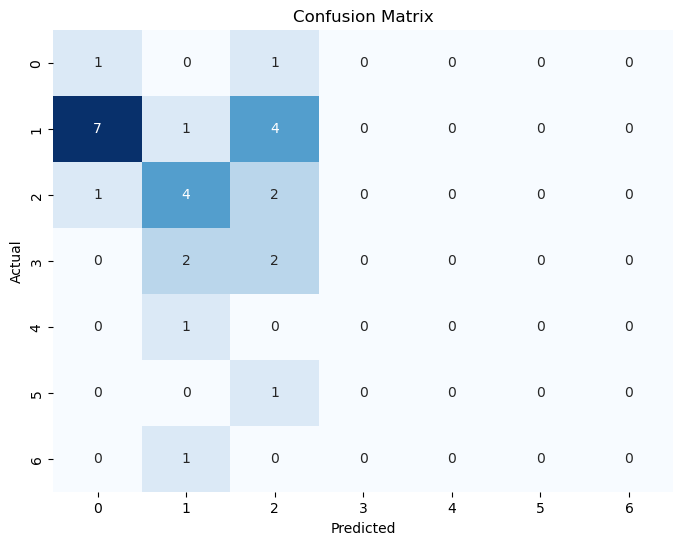

In [93]:
#| code-fold: true
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

The confusion matrix made up of my predicted and test data is quite interesting. I recognize that there is an abudance of zeros in the right side of the data which prompts further analysis about how effective the model is on estimate relationships between the data. Based on what I see, I think that it is likely that the data got complicated with as many features as it selected, so it decided to only focus on predicting instances where athletes had 0, 1, or 2 injuries. 

##### Actual vs Predicted Number of Injuries Plotted 

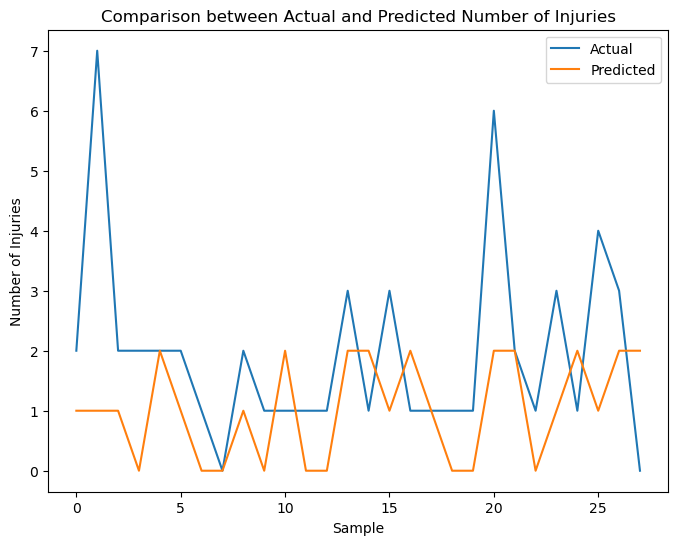

In [94]:
#| code-fold: true
plt.figure(figsize=(8, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Sample')
plt.ylabel('Number of Injuries')
plt.title('Comparison between Actual and Predicted Number of Injuries')
plt.legend()
plt.show()

This line graph of the predicted data vs actual data is not very specific, however, it does show us that based on the features that the model used, the number of injuries an athlete may have is a complicated thing to predict.

#### Chi-Squared Test Scores of Selected Features

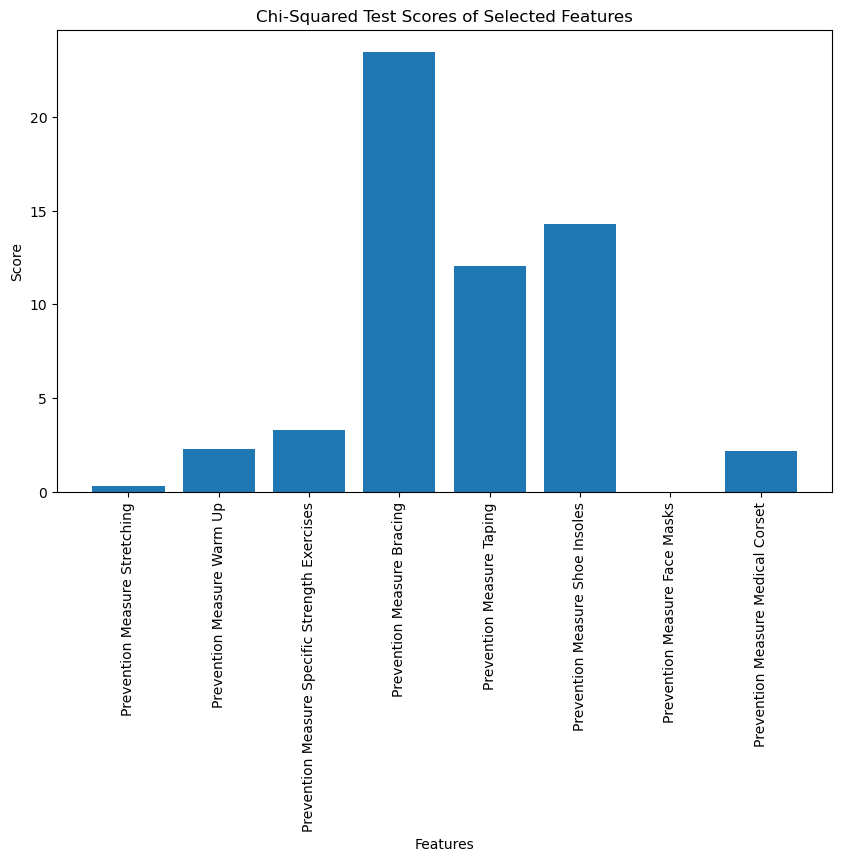

In [95]:
#| code-fold: true
feature_scores = selector.scores_
selected_feature_names = [col for col, mask in zip(X, selector.get_support()) if mask]

x_labels = ['Prevention Measure Stretching', 'Prevention Measure Warm Up',
       'Prevention Measure Specific Strength Exercises',
       'Prevention Measure Bracing', 'Prevention Measure Taping',
       'Prevention Measure Shoe Insoles', 'Prevention Measure Face Masks',
       'Prevention Measure Medical Corset']
plt.figure(figsize=(10, 6))
plt.bar(range(len(selected_feature_names)), feature_scores)
plt.xlabel('Features')
plt.xticks(range(len(x_labels)), x_labels)
plt.ylabel('Score')
plt.title('Chi-Squared Test Scores of Selected Features')
plt.xticks(rotation=90)
plt.show()

This graph shows what features are more associated with a higher number of injuries. The graph indicates that instances where athletes braced, taped, or used shoe insoles were more associated with a higher number of injuries, whereas instances where athletes utilized stretching, warming up, and strength exercises were more associated with a lower number of instances. In other words, stretching, warming up, and performing strengthening exercises are more likely to help prevent an injury. When we contextualize the results we understand that the instances where face masks or medical corsets are less common as they are used when the injury is more severe. 

### Conclusion Record Data 

The findings of using Naive Bayes and Feature Selection on this set of record data is that overall, the number of injuries that an athlete has is a hard thing to predict based on the prevention measures that they utilize. This data will be documented using this website, as well as on my GitHub. When formatted in presentations or reports, this data would be best represented in a tabular or graphic format for easy readability.

# Feature Selection for Text Data 

### Data Set Up

In [96]:
#| code-fold: true
df_features.columns

prevention_stretching = "Athletes can help protect themselves by preparing before and after a game or practice session by warming up muscles and then stretching. Exercises can include forward lunges, side lunges, standing quad stretch, seated straddle lotus, seated side straddle, seated toe touch, and the knees to chest stretch. Hold each stretch for 20 seconds. "
prevention_warm_up = "Warming up involves increasing the body's core temperature, heart rate, respiratory rate, and the body's muscle temperatures. By increasing muscle temperature, muscles become more loose and pliable, and by increasing heart rate and resipiatory rate, blood flood increases which helps to increase delivery of oxygen and nutrients to muscles. Warm up exercises include dynamic stretches, light bike riding, light jogging, jumproping, etc. "
prevention_specific_strength = "Specific strength exercises can refer to a wide range of exercises, from which a few are selected based each athlete. These exercises can range from muscle group specific weight-lifting exercises, to physical therapy-like exercises. These exercises depend on each athlete and are hard to define. "
prevention_bracing = "Basic braces provide general support and compression to specific areas of the body. More complex braces can do the same things, as well as promote healing, necessarily restrict movement, take weight off of an injury, etc. "
prevention_taping = "Taping can be used to reduce the range of motion at a joint and decrease swelling, which in turn can alleviate pain and prevent further injury. "
prevention_shoe_insoles = "Orthotics can alignment of an athlete's feet, ankles, knees, hips and back which can help prevent injuries. They can also absorb shock from impact of running to reduce stress on the athlete's joints and tissues. "
prevention_face_masks = "Athletic face masks can be used to protect maxillary, nasal, zygomatic and orbital injuries. These are worn in sports where a face injury could possible occur. "
prevention_medical_corset = "A medical corset is a corset that can be worn to help an athlete stablize their spine after a fracture or surgery. It will remind the athlete to not move in certain directors or to move more slowly to prevent causing further injury. "

prevention_definitions = {
    "Prevention Measure Stretching": prevention_stretching,
    "Prevention Measure Warm Up": prevention_warm_up,
    'Prevention Measure Specific Strength Exercises': prevention_specific_strength,
    'Prevention Measure Bracing': prevention_bracing, 
    'Prevention Measure Taping': prevention_taping,
    'Prevention Measure Shoe Insoles': prevention_shoe_insoles, 
    'Prevention Measure Face Masks': prevention_face_masks,
    'Prevention Measure Medical Corset': prevention_medical_corset
}

cols_keep = ['Number of Injuries', 'Prevention Measure Stretching', 'Prevention Measure Warm Up',
       'Prevention Measure Specific Strength Exercises',
       'Prevention Measure Bracing', 'Prevention Measure Taping',
       'Prevention Measure Shoe Insoles', 'Prevention Measure Face Masks',
       'Prevention Measure Medical Corset']
prevention_cols = ['Prevention Measure Stretching', 'Prevention Measure Warm Up',
       'Prevention Measure Specific Strength Exercises',
       'Prevention Measure Bracing', 'Prevention Measure Taping',
       'Prevention Measure Shoe Insoles', 'Prevention Measure Face Masks',
       'Prevention Measure Medical Corset']


si_subset = soccer_injury[cols_keep]
si_subset_prevention = si_subset[prevention_cols]

si_subset["Prevention Measures Definitions"] = ""

for col in si_subset.columns:
    if col.startswith("Prevention"):
        si_subset["Prevention Measures Definitions"] += si_subset[col].apply(
            lambda x: prevention_definitions[col] if x == 1 else ""
        )

si_subset.head()

/var/folders/kw/p7j6fdpx3vvgm6c0krhwpvb80000gn/T/ipykernel_46857/1461661087.py:39: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/kw/p7j6fdpx3vvgm6c0krhwpvb80000gn/T/ipykernel_46857/1461661087.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Number of Injuries,Prevention Measure Stretching,Prevention Measure Warm Up,Prevention Measure Specific Strength Exercises,Prevention Measure Bracing,Prevention Measure Taping,Prevention Measure Shoe Insoles,Prevention Measure Face Masks,Prevention Measure Medical Corset,Prevention Measures Definitions
0,6,1,0,1,0,0,0,0,0,Athletes can help protect themselves by prepar...
1,2,1,1,0,0,0,0,0,0,Athletes can help protect themselves by prepar...
2,7,1,0,0,0,0,1,0,0,Athletes can help protect themselves by prepar...
3,1,1,1,1,0,0,0,0,0,Athletes can help protect themselves by prepar...
4,2,1,1,0,0,1,0,0,0,Athletes can help protect themselves by prepar...


### Text Pre-processing

In [97]:
#| code-fold: true
import nltk
#nltk.download('punkt')
#nltk.download('wordnet')

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

from nltk.corpus import stopwords

from tqdm import tqdm
tqdm.pandas()

stopwords = set(stopwords.words("english"))


custom_stopwords = ["athlete", "include", "these", "further", "like", 'a', 'about', 'all', 'also', 'an', 'and', 'are', 'as', 'at',
    'be', 'both', 'but', 'by',
    'can',
    'do', "etc",
    'for', 'from',
    'get', 'go',
    'had', 'have',
    'i', 'if', 'in', 'is', 'it',
    'me', 'more', 'my',
    'no', 'not',
    'of', 'on', 'one', 'or', 'out',
    'should', "should've", 'so',
    'take', 'than', 'that', 'the', 'this', 'to', 'too',
    'up',
    'very',
    'want', 'was', 'we', 'were', 'what', 'where', 'which', 'with', 'would', "would've",
    'you', 'your']
custom_stoplemmas = [
    's'
]

import string
from collections import Counter
token_counter = Counter()

def remove_special_chars(token):
  return token.translate(str.maketrans('', '', string.punctuation))

def remove_digits(token):
  return ''.join([c for c in token if not c.isdigit()])


def clean_def(definitions):
  definitions_cleaned = definitions.lower()
  definitions_applied = sent_tokenize(definitions_cleaned)
  clean_applied = []
  for d in definitions_applied:
    def_tokens = word_tokenize(d)
    df_tokens_cleaned = [t for t in def_tokens if t not in custom_stopwords]
    df_tokens_cleaned = [remove_digits(t) for t in df_tokens_cleaned]
    df_tokens_cleaned = [t.replace("-", " ") for t in df_tokens_cleaned]
    df_tokens_cleaned = [remove_special_chars(t) for t in df_tokens_cleaned]
    df_tokens_cleaned = [t for t in df_tokens_cleaned if len(t) > 0]
    df_tokens_cleaned = [lemmatizer.lemmatize(t) for t in df_tokens_cleaned]
    df_tokens_cleaned = [t for t in df_tokens_cleaned if t not in custom_stoplemmas]
    token_counter.update(df_tokens_cleaned)
    clean_apply = ' '.join(df_tokens_cleaned)
    clean_applied.append(clean_apply)
  review_final = ". ".join(clean_applied)
  return review_final
si_subset["Prevention Measures Definitions Cleaned"] = si_subset["Prevention Measures Definitions"].progress_apply(clean_def)

si_subset.head()


100%|██████████| 139/139 [00:00<00:00, 1462.50it/s]
/var/folders/kw/p7j6fdpx3vvgm6c0krhwpvb80000gn/T/ipykernel_46857/936217507.py:68: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Number of Injuries,Prevention Measure Stretching,Prevention Measure Warm Up,Prevention Measure Specific Strength Exercises,Prevention Measure Bracing,Prevention Measure Taping,Prevention Measure Shoe Insoles,Prevention Measure Face Masks,Prevention Measure Medical Corset,Prevention Measures Definitions,Prevention Measures Definitions Cleaned
0,6,1,0,1,0,0,0,0,0,Athletes can help protect themselves by prepar...,athlete help protect themselves preparing befo...
1,2,1,1,0,0,0,0,0,0,Athletes can help protect themselves by prepar...,athlete help protect themselves preparing befo...
2,7,1,0,0,0,0,1,0,0,Athletes can help protect themselves by prepar...,athlete help protect themselves preparing befo...
3,1,1,1,1,0,0,0,0,0,Athletes can help protect themselves by prepar...,athlete help protect themselves preparing befo...
4,2,1,1,0,0,1,0,0,0,Athletes can help protect themselves by prepar...,athlete help protect themselves preparing befo...


In [98]:
#| code-fold: true
print("MOST COMMON WORDS:")
token_counter.most_common(25)

MOST COMMON WORDS:


[('exercise', 478),
 ('muscle', 473),
 ('stretch', 456),
 ('seated', 381),
 ('rate', 300),
 ('lunge', 254),
 ('side', 254),
 ('straddle', 254),
 ('help', 241),
 ('increasing', 225),
 ('temperature', 225),
 ('each', 219),
 ('warming', 202),
 ('body', 166),
 ('knee', 165),
 ('heart', 150),
 ('increase', 150),
 ('light', 150),
 ('range', 142),
 ('after', 128),
 ('athlete', 127),
 ('protect', 127),
 ('themselves', 127),
 ('preparing', 127),
 ('before', 127)]

### Vectorization

This text data is trained using vectorization. First the corpus is created and is fitted using CountVectorizer. This finds the frequency of the words so the most common words can then be easily found. Then, KMeans clustering will be used to assign each data point to a cluster.

In [99]:
#| code-fold: true
from sklearn.feature_extraction.text import CountVectorizer

corpus = si_subset["Prevention Measures Definitions Cleaned"].values
max_document_freq = 0.4
min_document_count = 6

cv = CountVectorizer(max_df=max_document_freq, min_df=min_document_count)
X = cv.fit_transform(corpus)
print(X)

feature_names = cv.get_feature_names_out()

cv_ng = CountVectorizer(max_df=max_document_freq, min_df=min_document_count,
                              stop_words=custom_stopwords)
X_ng = cv_ng.fit_transform(corpus)

  (0, 39)	1
  (0, 33)	1
  (0, 51)	1
  (0, 14)	1
  (0, 37)	1
  (0, 6)	1
  (0, 17)	1
  (0, 22)	1
  (0, 30)	1
  (0, 44)	1
  (0, 23)	1
  (0, 13)	1
  (0, 18)	1
  (0, 12)	1
  (2, 28)	1
  (2, 1)	1
  (2, 15)	1
  (2, 3)	1
  (2, 20)	1
  (2, 5)	1
  (2, 45)	1
  (2, 0)	1
  (2, 38)	1
  (2, 21)	1
  (2, 35)	1
  :	:
  (136, 42)	1
  (136, 48)	1
  (136, 2)	1
  (136, 29)	1
  (137, 28)	1
  (137, 1)	1
  (137, 15)	1
  (137, 3)	1
  (137, 20)	1
  (137, 5)	1
  (137, 45)	1
  (137, 0)	1
  (137, 38)	1
  (137, 21)	1
  (137, 35)	1
  (137, 40)	1
  (137, 47)	1
  (137, 43)	1
  (137, 49)	1
  (137, 24)	1
  (137, 11)	1
  (137, 42)	1
  (137, 48)	1
  (137, 2)	1
  (137, 29)	1


/Users/reneedemaio/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:408: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ve'] not in stop_words.



### KMeans Clustering

In [100]:
#| code-fold: true
from sklearn.cluster import KMeans

kmeans = KMeans(init="random", n_clusters=2, n_init=4, random_state=5000)
kmeans.fit(X)
y_pred = kmeans.predict(X)
y_pred

len(y_pred[y_pred==0])
len(y_pred[y_pred==1])

from sklearn.metrics import pairwise_distances_argmin_min

centroids = kmeans.cluster_centers_
centroids.shape

argmins, mins = pairwise_distances_argmin_min(centroids, X)
argmins, mins

argmins_0 = argmins[0]
y_pred[argmins_0]

si_subset.iloc[argmins_0][["Prevention Measures Definitions Cleaned"]]

argmins_1 = argmins[1]
y_pred[argmins_1]

si_subset.iloc[argmins_1]["Prevention Measures Definitions Cleaned"]

si_subset["y_pred"] = y_pred
si_subset.head()

/var/folders/kw/p7j6fdpx3vvgm6c0krhwpvb80000gn/T/ipykernel_46857/288996772.py:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Number of Injuries,Prevention Measure Stretching,Prevention Measure Warm Up,Prevention Measure Specific Strength Exercises,Prevention Measure Bracing,Prevention Measure Taping,Prevention Measure Shoe Insoles,Prevention Measure Face Masks,Prevention Measure Medical Corset,Prevention Measures Definitions,Prevention Measures Definitions Cleaned,y_pred
0,6,1,0,1,0,0,0,0,0,Athletes can help protect themselves by prepar...,athlete help protect themselves preparing befo...,0
1,2,1,1,0,0,0,0,0,0,Athletes can help protect themselves by prepar...,athlete help protect themselves preparing befo...,1
2,7,1,0,0,0,0,1,0,0,Athletes can help protect themselves by prepar...,athlete help protect themselves preparing befo...,1
3,1,1,1,1,0,0,0,0,0,Athletes can help protect themselves by prepar...,athlete help protect themselves preparing befo...,0
4,2,1,1,0,0,1,0,0,0,Athletes can help protect themselves by prepar...,athlete help protect themselves preparing befo...,1


In [101]:
#| code-fold: true
pd.crosstab(si_subset['Number of Injuries'], si_subset['y_pred'])


y_pred,0,1
Number of Injuries,,
0,6,16
1,11,30
2,15,27
3,5,10
4,5,6
5,2,1
6,2,0
7,0,2
10,0,1


In [102]:
#| code-fold: true
pd.crosstab(si_subset['Number of Injuries'], si_subset['y_pred'], normalize='all', margins=True)


y_pred,0,1,All
Number of Injuries,,,
0,0.043165,0.115108,0.158273
1,0.079137,0.215827,0.294964
2,0.107914,0.194245,0.302158
3,0.035971,0.071942,0.107914
4,0.035971,0.043165,0.079137
5,0.014388,0.007194,0.021583
6,0.014388,0.000000,0.014388
7,0.000000,0.014388,0.014388
10,0.000000,0.007194,0.007194


In [103]:
#| code-fold: true
pd.crosstab(si_subset['Number of Injuries'], si_subset['y_pred'], normalize='index')


y_pred,0,1
Number of Injuries,,
0,0.272727,0.727273
1,0.268293,0.731707
2,0.357143,0.642857
3,0.333333,0.666667
4,0.454545,0.545455
5,0.666667,0.333333
6,1.000000,0.000000
7,0.000000,1.000000
10,0.000000,1.000000


This data indicates that if an athlete has 4 or fewer injuries, they are much more likely to be doing a prevention measure than not. If an athlete has 5 or 6 injuries, it is more likely than they are not doing any prevention measures. Athletes with 7 or 10 injuries can be considered outliers.

### Visualizing Clusters

In [104]:
#| code-fold: true
from sklearn.manifold import TSNE

def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 3, figsize=(30, 15)) #, sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[-n_top_words:]
        top_features = feature_names[top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx + 1}", fontdict={"fontsize": 30})
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

n_top_words = 20
num_topics = 6

from sklearn.decomposition import LatentDirichletAllocation, NMF
nmf = NMF(
    n_components=num_topics,
    random_state=5000,
    beta_loss="frobenius",
)
nmf.fit(X)

NMF(n_components=6, random_state=5000)

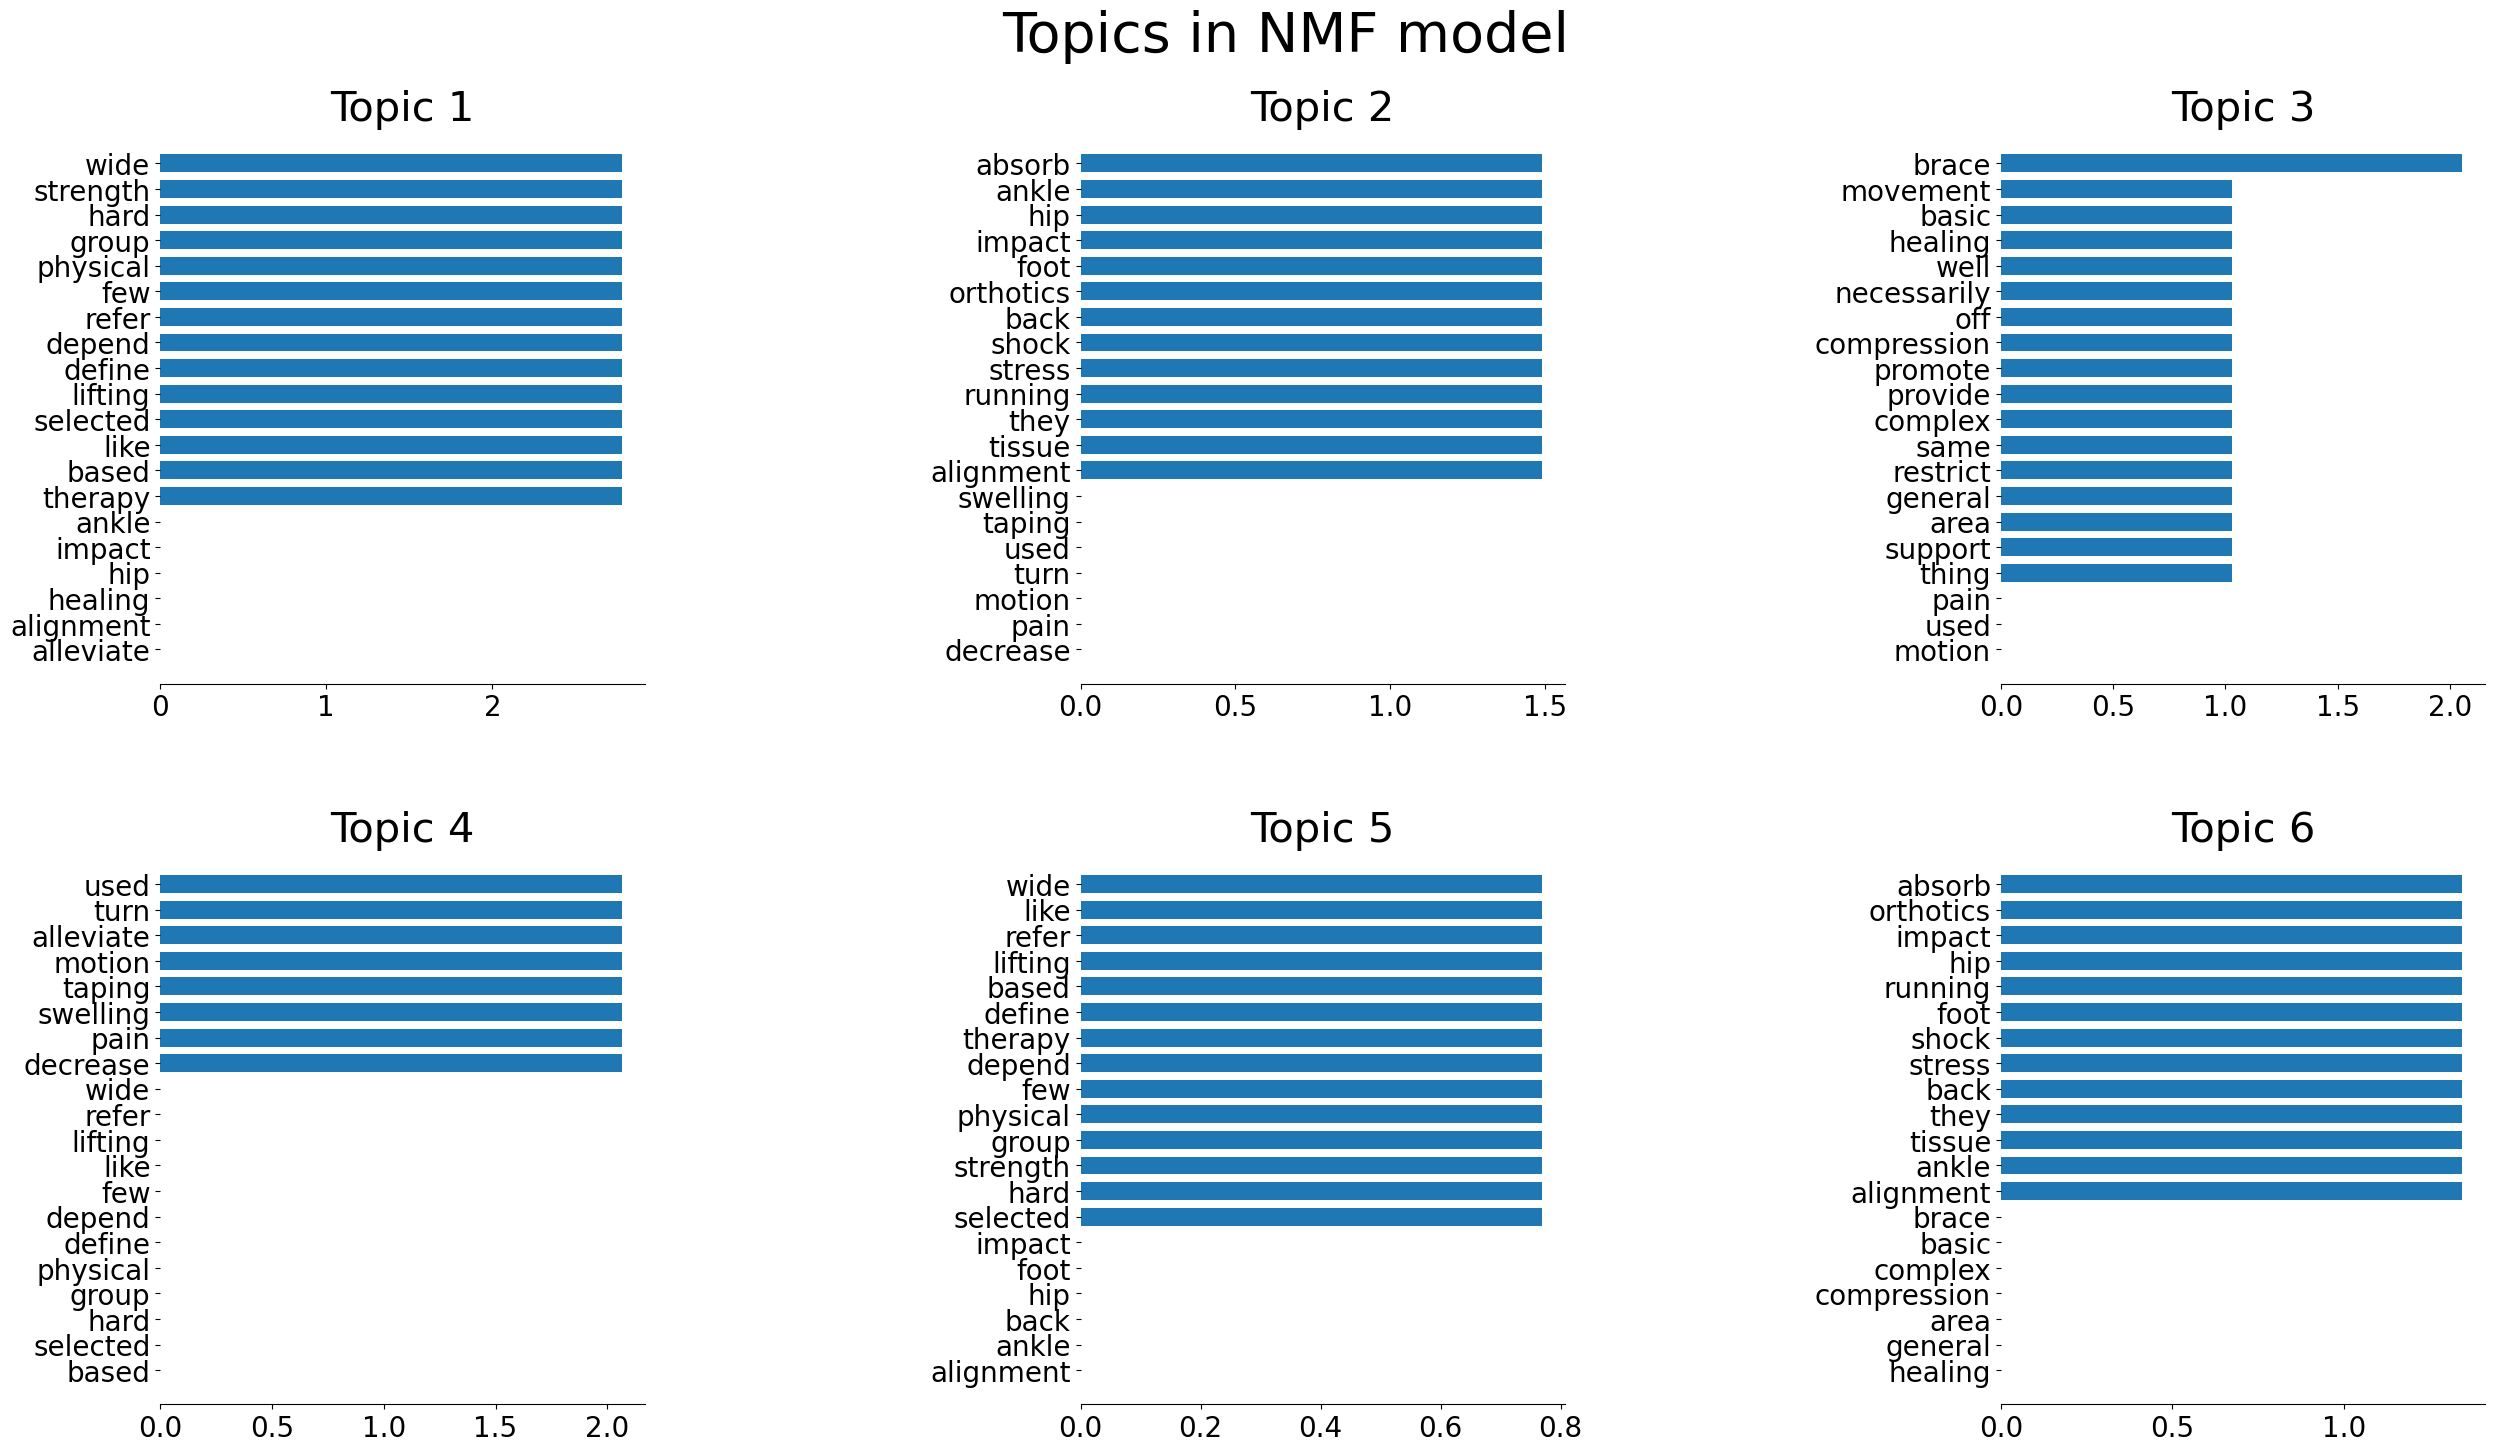

In [105]:
#| code-fold: true
plot_top_words(nmf, feature_names, n_top_words, "Topics in NMF model")

This set of graphs groups together language that tends to be correlated. For example, topic 3 is likely to be grouped around words that relate to bracing as it includes "brace", "movement", "compression", "restrict", etc.

In [106]:
#| code-fold: true
from sklearn.manifold import TSNE

nmf_ng = NMF(
    n_components=num_topics,
    random_state=5000,
    beta_loss="frobenius",
    max_iter=1000
)
nmf_ng.fit(X_ng)

nmf_ng_components = nmf_ng.components_
nmf_ng_components.shape

W = nmf_ng.transform(X_ng)
W.shape

W[:5,:]

W_df = pd.DataFrame(W)
W_df["cluster"] = W_df.idxmax(axis=1)
W_df["cluster"].value_counts
W_df.head()

,0,1,2,3,4,5,cluster
0,5.952042e-10,0.590725,0.000000e+00,0.000000,0.00000,0.0,1
1,0.000000e+00,0.000000,0.000000e+00,0.000000,0.00000,0.0,0
2,4.345643e-04,0.000000,0.000000e+00,0.000000,0.73538,0.0,4
3,5.952042e-10,0.590725,0.000000e+00,0.000000,0.00000,0.0,1
4,0.000000e+00,0.000000,2.125568e-19,0.461763,0.00000,0.0,3


/Users/reneedemaio/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/reneedemaio/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/reneedemaio/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



<Axes: xlabel='x', ylabel='y'>

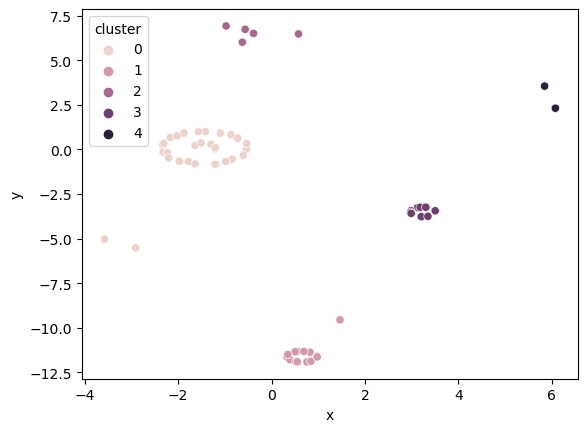

In [107]:
#| code-fold: true
tsne_model = TSNE(
    init='random',
    random_state=5000
)
tsne_embedding = tsne_model.fit_transform(W)
tsne_df = pd.DataFrame(tsne_embedding, columns=['x','y'])
tsne_df.shape
tsne_df['cluster'] = W_df['cluster']
tsne_df['Definitions'] = si_subset["Prevention Measures Definitions"]
tsne_sample_size = 100
tsne_sample_df = tsne_df.sample(tsne_sample_size, random_state=5000)
sns.scatterplot(tsne_sample_df, x='x', y='y', hue='cluster')

This is a general graph of the clusters that are present within the data. These clusters represent different prevention measures that are used. However, this graph isn't very information on what each cluster represents.

In [108]:
#| code-fold: true
import textwrap
mywrap = lambda x: textwrap.wrap(x, width=60)
tsne_sample_df['Definitions'] = tsne_sample_df['Definitions'].apply(lambda x: x if type(x) == str else '')
tsne_sample_df['Definitions_wrap'] = tsne_sample_df['Definitions'].apply(lambda x: '<br>'.join(mywrap(x)))
import plotly
import plotly.express as px
review_fig = px.scatter(tsne_sample_df, x='x', y='y', color='cluster',
                        hover_data=['Definitions_wrap'], template='simple_white')
review_fig.update(layout_coloraxis_showscale=False)
review_fig.update_traces(marker=dict(size=12),selector=dict(mode='markers'))

import plotly.io as pio
pio.renderers.default = "plotly_mimetype+notebook_connected"

In [109]:
#| code-fold: true
plotly.offline.plot(review_fig, filename='interactive_plot.html')

from IPython.display import IFrame
IFrame(src='interactive_plot.html', width=800, height=600)

This clustering graph is much more specific as its interactive nature allows us to see what factors are grouping each cluster together. For example, the yellow cluster is likely clustered around orthotics as both of these points include orthotics as they main point of commonality. The green cluster is likely using taping as its point of commonality. It is important to note the prevention measures such as stretching and warming up are quite universal, so they don't hold as much influence in terms of determining their own cluster. 